# **Siniestros Viales**
### **1. ETL - Extracción, Transformación y Carga**

In [1]:
import pandas as pd

In [2]:
import random

In [3]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

### **Extracción y lectura de los datasets**

In [4]:
hechos = pd.read_excel("./Datasets/homicidios.xlsx",sheet_name = "HECHOS")
#victimas = pd.read_excel("./Datasets/homicidios.xlsx",sheet_name = "VICTIMAS")


#### **Tratamiento de los datos de los dataset**
- ##### **`Homicidios - hechos`**

array([[<Axes: title={'center': 'N_VICTIMAS'}>,
        <Axes: title={'center': 'FECHA'}>,
        <Axes: title={'center': 'AAAA'}>],
       [<Axes: title={'center': 'MM'}>, <Axes: title={'center': 'DD'}>,
        <Axes: title={'center': 'Altura'}>],
       [<Axes: title={'center': 'COMUNA'}>, <Axes: >, <Axes: >]],
      dtype=object)

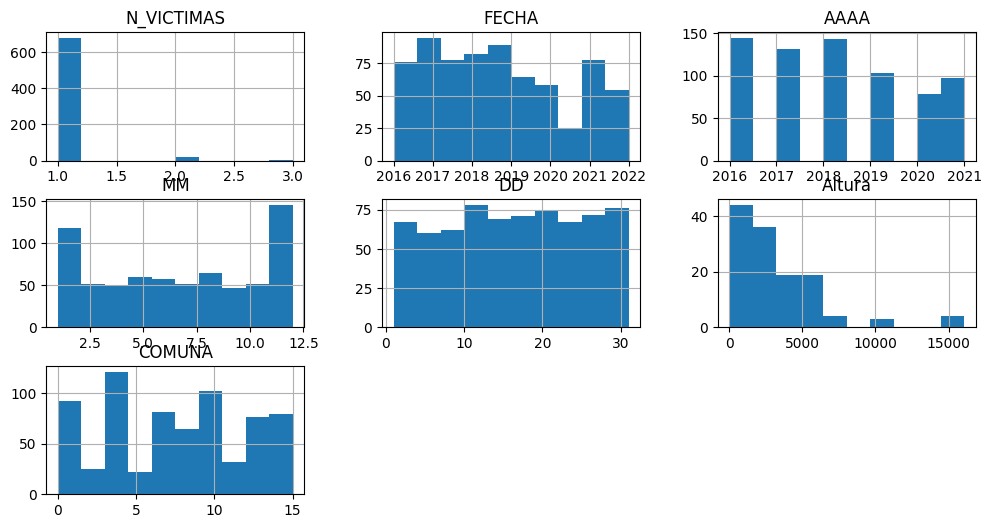

In [5]:
hechos.hist(figsize=(12,6))

Tenemos 696 Registros de accidentes fatales entre el año 2016 y 2021, Hay datos nulos y datos que no estan normalizados

In [6]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Revisión de nulos y duplicados

In [7]:
hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

La intension de extraer la porcion de datos siguiente es para centrar mi analisis Geografico en estos datos

In [8]:
hechosGeografico = hechos[['VICTIMA','pos x','pos y','TIPO_DE_CALLE','COMUNA','AAAA']]
hechosGeografico

,VICTIMA,pos x,pos y,TIPO_DE_CALLE,COMUNA,AAAA
0,MOTO,-58.47533969,-34.68757022,AVENIDA,8,2016
1,AUTO,-58.50877521,-34.66977709,GRAL PAZ,9,2016
2,MOTO,-58.39040293,-34.63189362,AVENIDA,1,2016
3,MOTO,-58.46503904,-34.68092974,AVENIDA,8,2016
4,MOTO,-58.38718297,-34.62246630,AVENIDA,1,2016
...,...,...,...,...,...,...
691,MOTO,-58.43353773,-34.64561636,AVENIDA,7,2021
692,MOTO,-58.46739825,-34.65117757,AUTOPISTA,9,2021
693,MOTO,-58.47293407,-34.61984745,AVENIDA,11,2021
694,AUTO,-58.47066794,-34.65021673,AVENIDA,9,2021


In [9]:
# Contar los valores nulos en cada columna y mostrar el resultado
print("Cantidad de valores nulos en la columna 'AAAA':", hechosGeografico['AAAA'].isnull().sum())
print("Cantidad de valores nulos en la columna 'COMUNA':", hechosGeografico['COMUNA'].isnull().sum())
print("Cantidad de valores nulos en la columna 'VICTIMA':", hechosGeografico['VICTIMA'].isnull().sum())
print("Cantidad de valores nulos en la columna 'TIPO_DE_CALLE':", hechosGeografico['TIPO_DE_CALLE'].isnull().sum())

Cantidad de valores nulos en la columna 'AAAA': 0
Cantidad de valores nulos en la columna 'COMUNA': 0
Cantidad de valores nulos en la columna 'VICTIMA': 0
Cantidad de valores nulos en la columna 'TIPO_DE_CALLE': 0


In [10]:
# Contar los valores distintos en cada columna y mostrar el resultado
print("Cantidad de tipos de valores distintos en la columna 'AAAA':", hechosGeografico['AAAA'].value_counts())
print("Cantidad de tipos de valores distintos en la columna 'COMUNA':", hechosGeografico['COMUNA'].value_counts())
print("Cantidad de tipos de valores distintos en la columna 'VICTIMA':", hechosGeografico['VICTIMA'].value_counts())
print("Cantidad de tipos de valores distintos en la columna 'TIPO_DE_CALLE':", hechosGeografico['TIPO_DE_CALLE'].value_counts())

Cantidad de tipos de valores distintos en la columna 'AAAA': AAAA
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64
Cantidad de tipos de valores distintos en la columna 'COMUNA': COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64
Cantidad de tipos de valores distintos en la columna 'VICTIMA': VICTIMA
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64
Cantidad de tipos de valores distintos en la columna 'TIPO_DE_CALLE': TIPO_DE_CALLE
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64


In [11]:
# Renombrar la columna 'AAAA' a 'Año'
hechosGeografico.rename(columns={'AAAA': 'Año'}, inplace=True)

# Convertir los valores de la columna 'Año' a números
hechosGeografico['Año'] = pd.to_numeric(hechos['Año'])

C:\Users\ahurt\AppData\Local\Temp\ipykernel_12188\4207300559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hechosGeografico.rename(columns={'AAAA': 'Año'}, inplace=True)


KeyError: 'Año'

In [ ]:
hechosGeografico['TIPO_DE_CALLE'].unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

In [ ]:
hechosGeografico['COMUNA'].dtype

dtype('int64')

In [ ]:
# Guardar el DataFrame en formato Parquet
hechosGeografico.to_parquet('./Data/hechosGeograficos.parquet')

In [ ]:
hechos 


,VICTIMA,pos x,pos y,TIPO_DE_CALLE,COMUNA,Año
0,MOTO,-58.47533969,-34.68757022,AVENIDA,8,2016
1,AUTO,-58.50877521,-34.66977709,GRAL PAZ,9,2016
2,MOTO,-58.39040293,-34.63189362,AVENIDA,1,2016
3,MOTO,-58.46503904,-34.68092974,AVENIDA,8,2016
4,MOTO,-58.38718297,-34.62246630,AVENIDA,1,2016
...,...,...,...,...,...,...
691,MOTO,-58.43353773,-34.64561636,AVENIDA,7,2021
692,MOTO,-58.46739825,-34.65117757,AUTOPISTA,9,2021
693,MOTO,-58.47293407,-34.61984745,AVENIDA,11,2021
694,AUTO,-58.47066794,-34.65021673,AVENIDA,9,2021


In [ ]:
import matplotlib.pyplot as plt

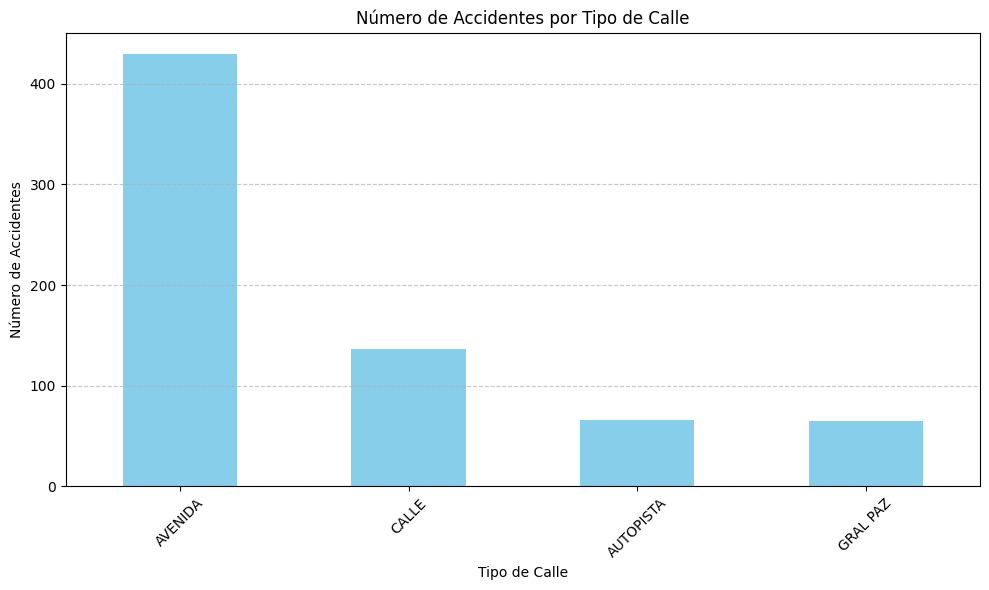

In [ ]:
# Contar el número de accidentes por tipo de calle
accidentes_por_tipo_calle = hechos['TIPO_DE_CALLE'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_tipo_calle.plot(kind='bar', color='skyblue')
plt.title('Número de Accidentes por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
hechos['pos x'] = pd.to_numeric(hechos['pos x'], errors='coerce')
hechos['pos y'] = pd.to_numeric(hechos['pos y'], errors='coerce')
hechos = hechos.dropna(subset=['pos x', 'pos y'])
mapa = folium.Map(location=[hechos['pos y'].iloc[100], hechos['pos x'].iloc[100]], zoom_start=12)

# marcadores
marker_cluster = MarkerCluster().add_to(mapa)

for index, row in hechos.iterrows():
        folium.Marker([row['pos y'], row['pos x']],
                      popup=f"ID:  {row['VICTIMA']}",
                      icon=folium.Icon(color='red')).add_to(marker_cluster)

mapa

In [15]:
hechos.columns = [x.capitalize() for x in hechos.columns]

# Se reemplazan los guiones por espacios
hechos.columns = hechos.columns.str.replace('_', ' ')
# Se renombran algunas columnas
hechos = hechos.rename(columns={'Id': 'Id',
                                'Aaaa':'Año',
                                'Mm':'Mes',
                                'Dd':'Dia',
                                'Victima':'Victima'})

In [23]:
hechos['Hora'] = hechos['Hora'].astype(str)


In [29]:
hechos['Hh'] = hechos['Hh'].replace('SD', 0).astype(int)

C:\Users\ahurt\AppData\Local\Temp\ipykernel_12188\723443731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hechos['Hh'] = hechos['Hh'].replace('SD', 0).astype(int)


In [30]:
hechos.to_parquet('./Data/hechos.parquet')